## Objective

Comparative study of KNN and Decision tree for predicting Students Adaptability level in Online Education.

### Import libraries

In [151]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# importing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

### Read Data

In [152]:
df = pd.read_csv("students_adaptability_level_online_education - [Template] students_adaptability_level_online_education.csv")

In [153]:
df

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low


### Generate Data Profiling Report

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [155]:
df.describe()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


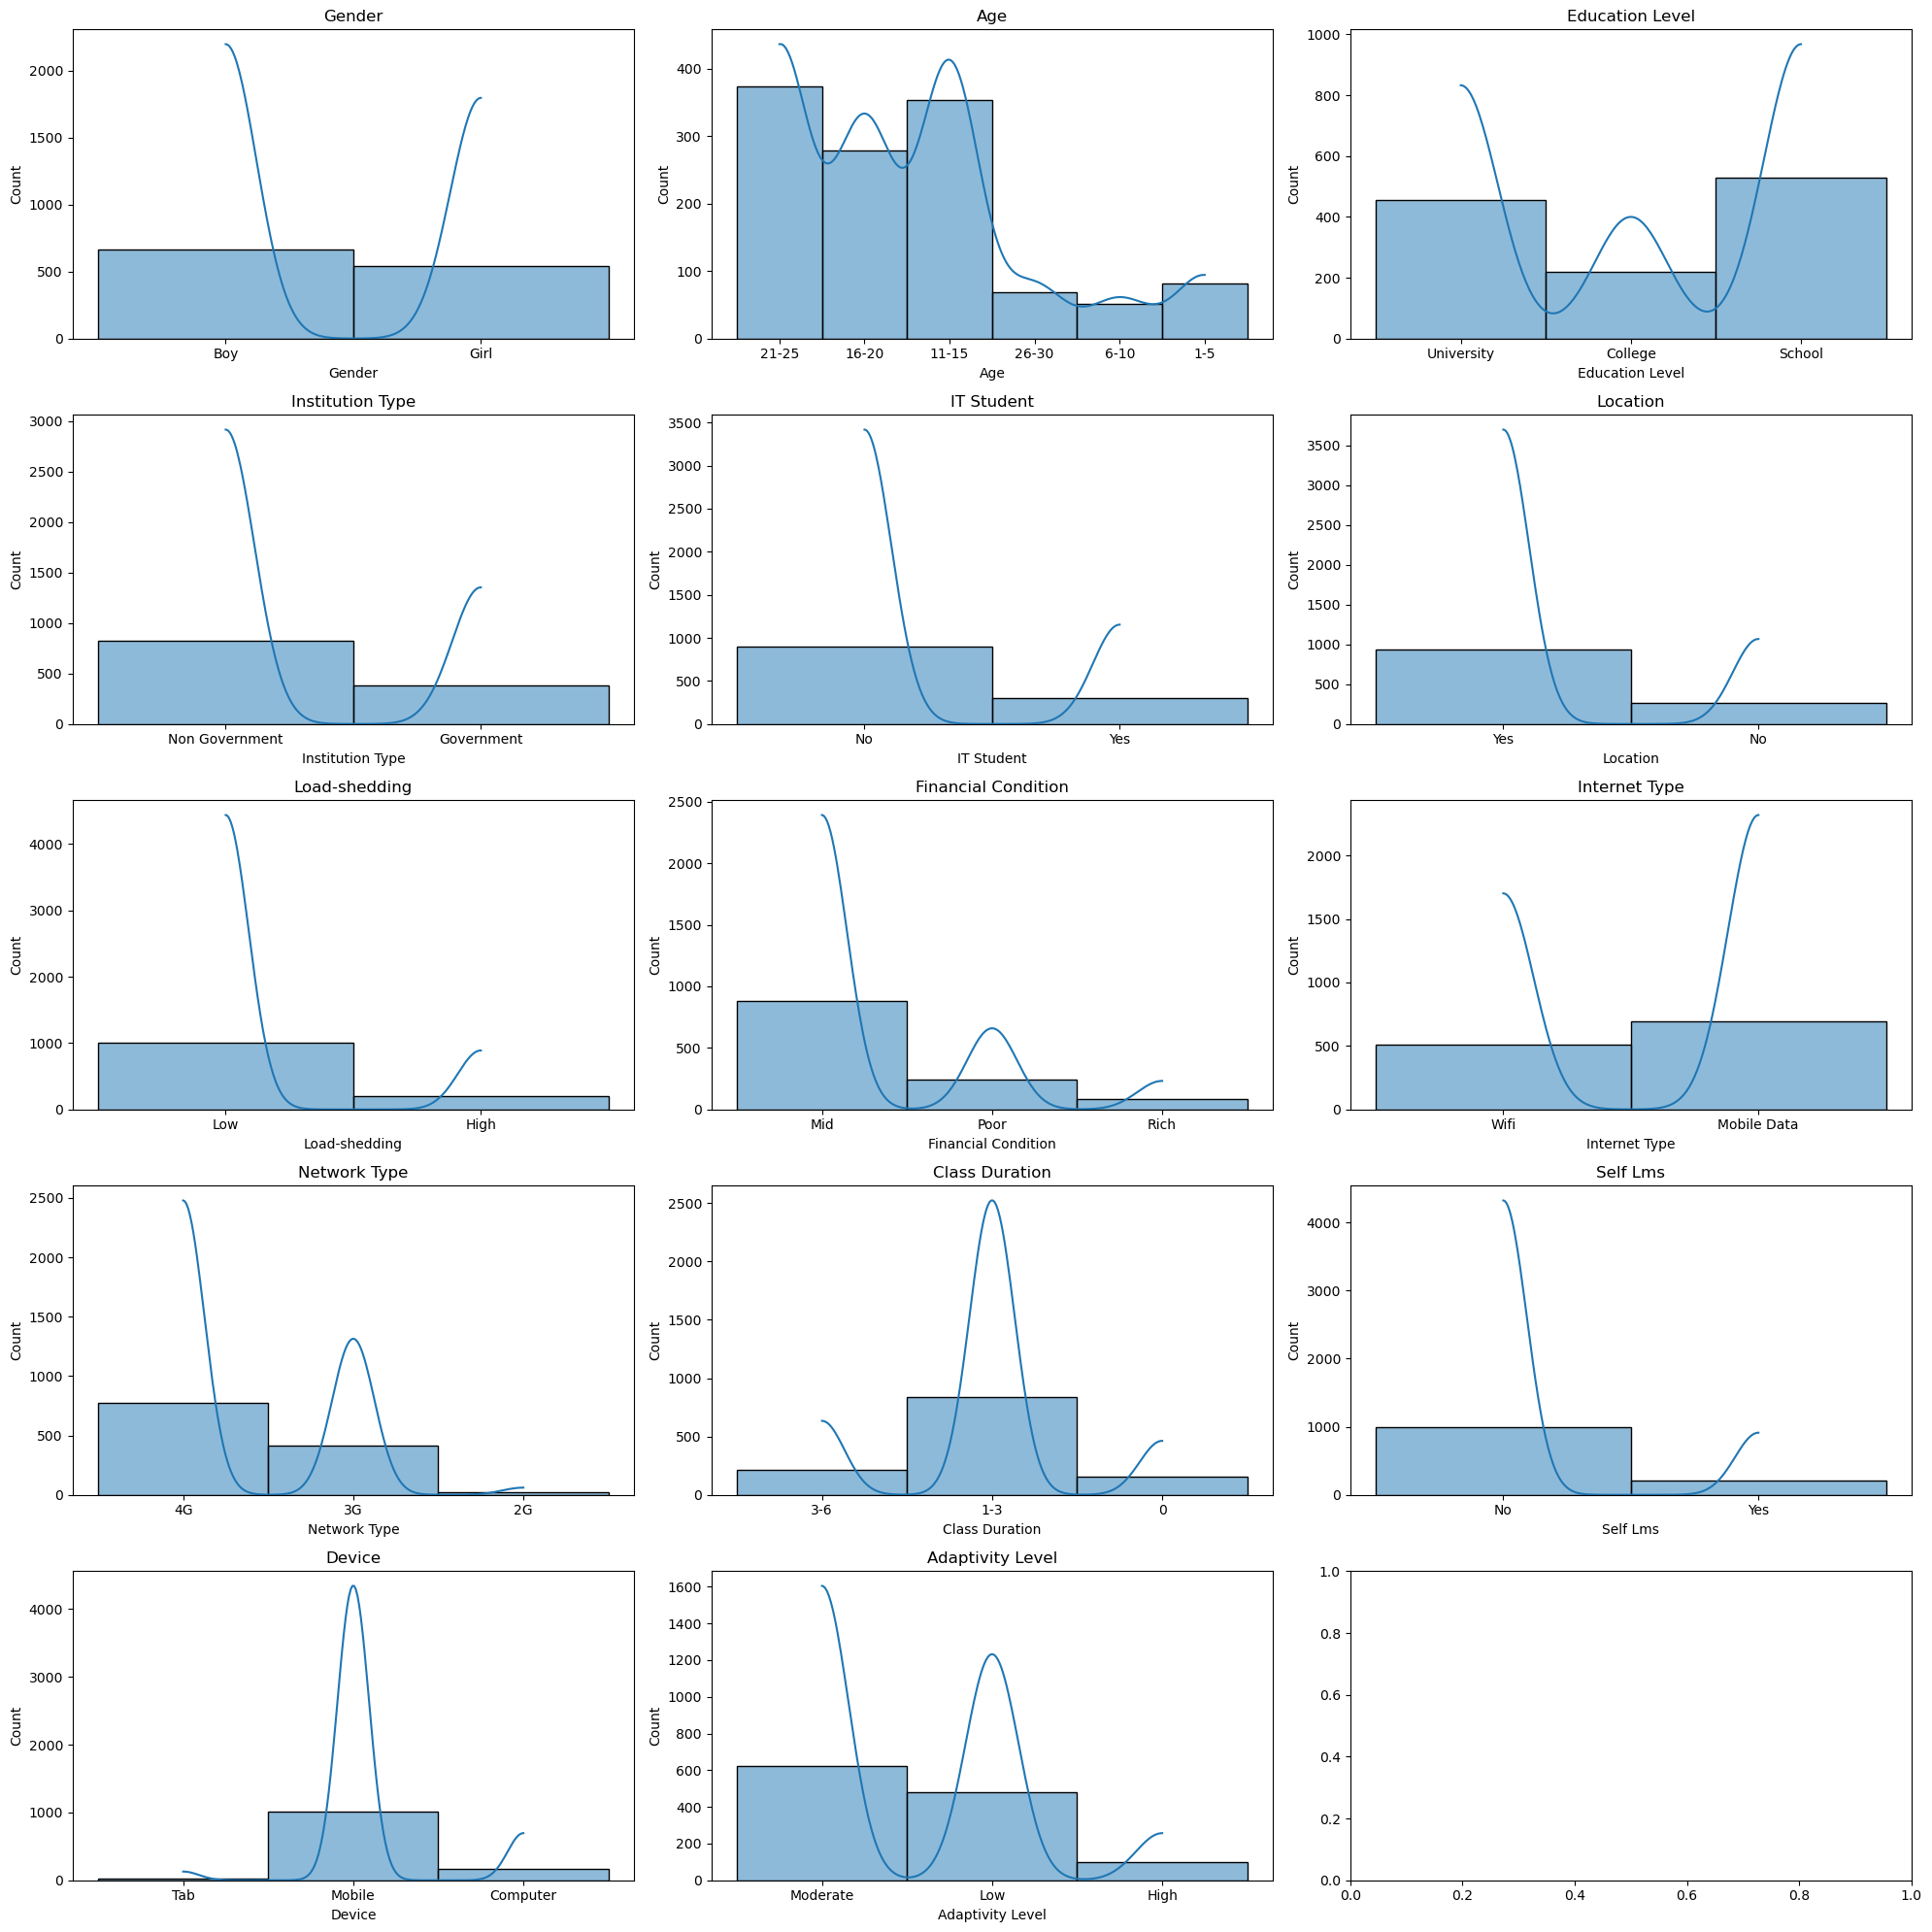

In [156]:
# Plotting distributions of various features
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))

columns = df.columns
index = 0

for i in range(5):
    for j in range(3):
        if index < len(columns):
            sns.histplot(df[columns[index]], kde=True, ax=axes[i, j])
            axes[i, j].set_title(columns[index])
            index += 1

plt.tight_layout()
plt.show()

# Encoding

Choose a suitable encoding technique for the columns.

In [157]:
# Encoding the identified categorical variables
df_encoded = pd.get_dummies(df, columns=['Age','Gender','Education Level','Institution Type','IT Student','Location','Load-shedding','Financial Condition','Internet Type','Network Type','Class Duration','Self Lms','Device',], drop_first=True)

# Displaying the first few rows of the encoded dataframe
df_encoded.head()

,Adaptivity Level,Age_11-15,Age_16-20,Age_21-25,Age_26-30,Age_6-10,Gender_Girl,Education Level_School,Education Level_University,Institution Type_Non Government,...,Financial Condition_Poor,Financial Condition_Rich,Internet Type_Wifi,Network Type_3G,Network Type_4G,Class Duration_1-3,Class Duration_3-6,Self Lms_Yes,Device_Mobile,Device_Tab
0,Moderate,False,False,True,False,False,False,False,True,True,...,False,False,True,False,True,False,True,False,False,True
1,Moderate,False,False,True,False,False,True,False,True,True,...,False,False,False,False,True,True,False,True,True,False
2,Moderate,False,True,False,False,False,True,False,False,False,...,False,False,True,False,True,True,False,False,True,False
3,Moderate,True,False,False,False,False,True,True,False,True,...,False,False,False,False,True,True,False,False,True,False
4,Low,False,True,False,False,False,True,True,False,True,...,True,False,False,True,False,False,False,False,True,False


### Check distribution

In [158]:
# Checking distribution of one-hot encoded columns
for column in df_encoded.columns:
    print(f"\nValue counts for {column}:")
    print(df_encoded[column].value_counts())



Value counts for Adaptivity Level:
Adaptivity Level
Moderate    625
Low         480
High        100
Name: count, dtype: int64

Value counts for Age_11-15:
Age_11-15
False    852
True     353
Name: count, dtype: int64

Value counts for Age_16-20:
Age_16-20
False    927
True     278
Name: count, dtype: int64

Value counts for Age_21-25:
Age_21-25
False    831
True     374
Name: count, dtype: int64

Value counts for Age_26-30:
Age_26-30
False    1137
True       68
Name: count, dtype: int64

Value counts for Age_6-10:
Age_6-10
False    1154
True       51
Name: count, dtype: int64

Value counts for Gender_Girl:
Gender_Girl
False    663
True     542
Name: count, dtype: int64

Value counts for Education Level_School:
Education Level_School
False    675
True     530
Name: count, dtype: int64

Value counts for Education Level_University:
Education Level_University
False    749
True     456
Name: count, dtype: int64

Value counts for Institution Type_Non Government:
Institution Type_Non Governm

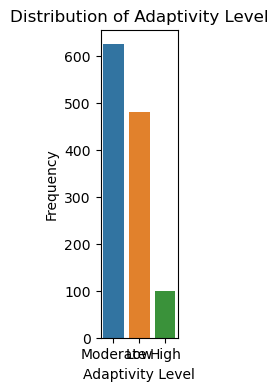

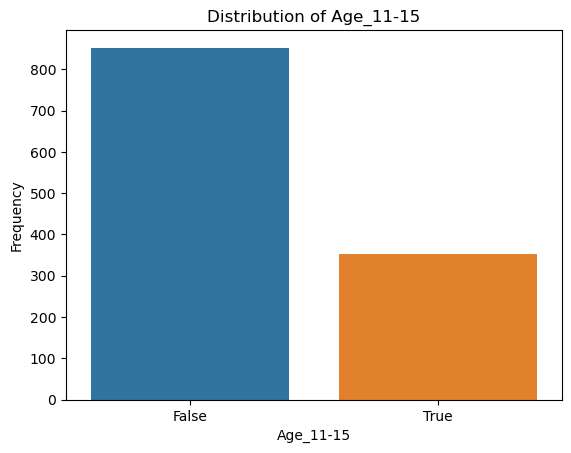

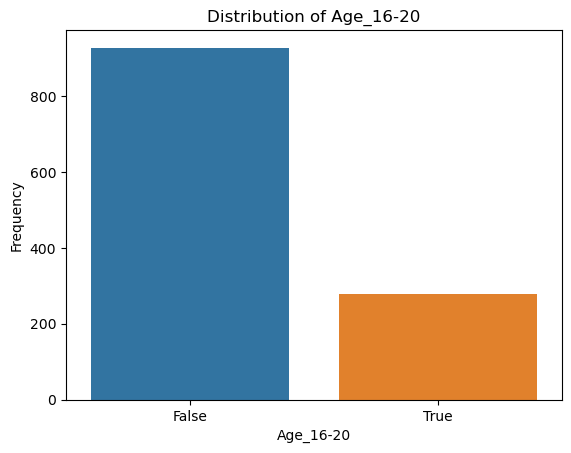

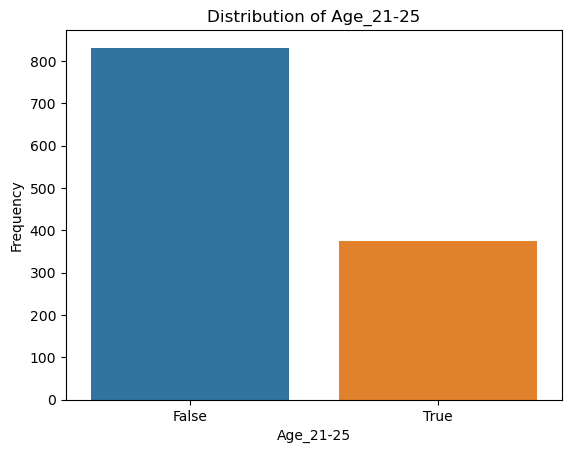

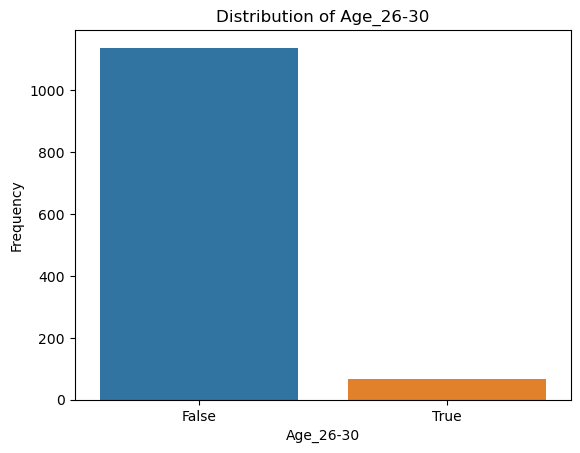

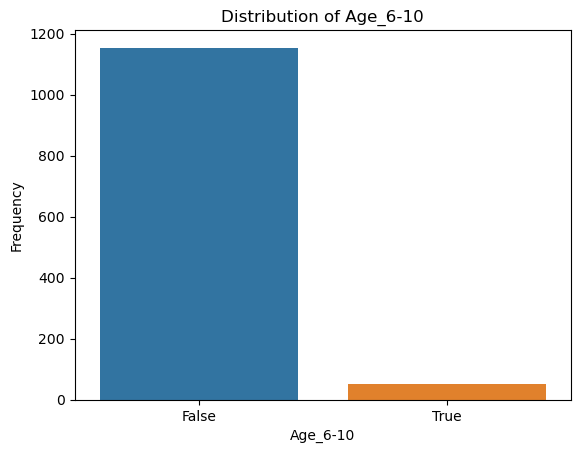

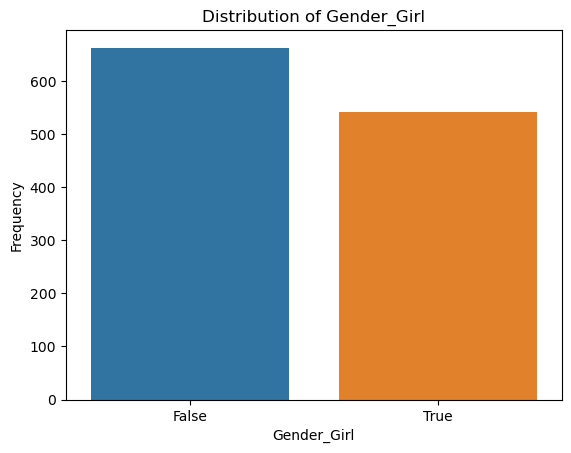

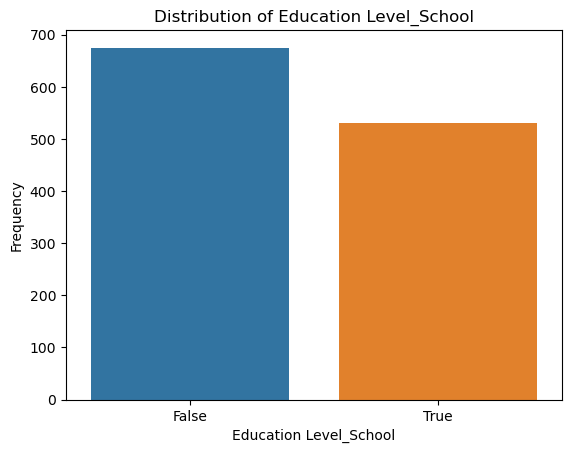

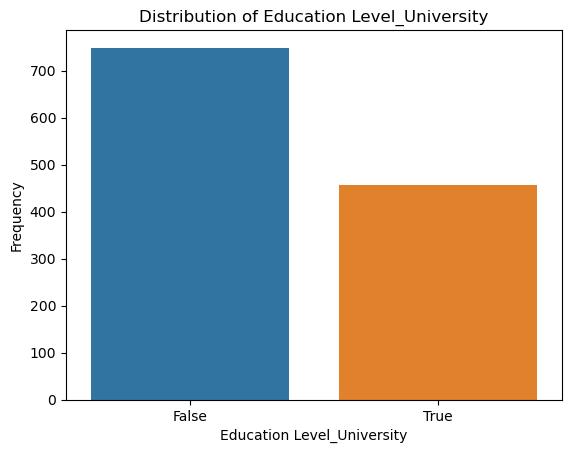

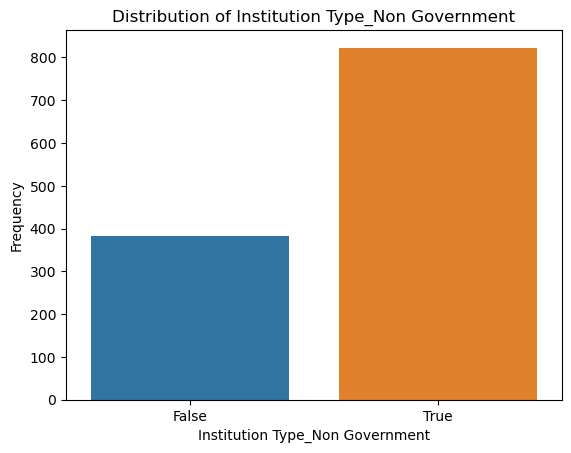

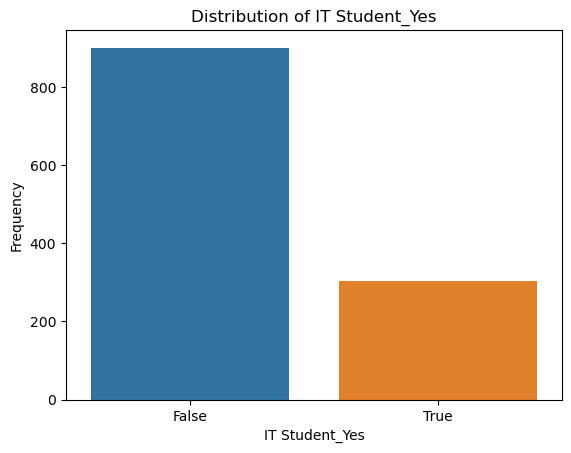

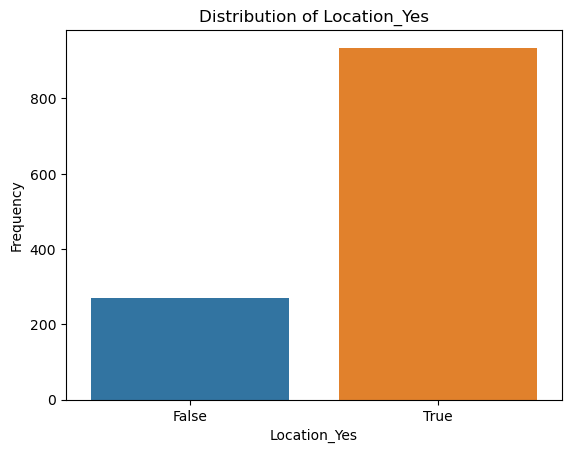

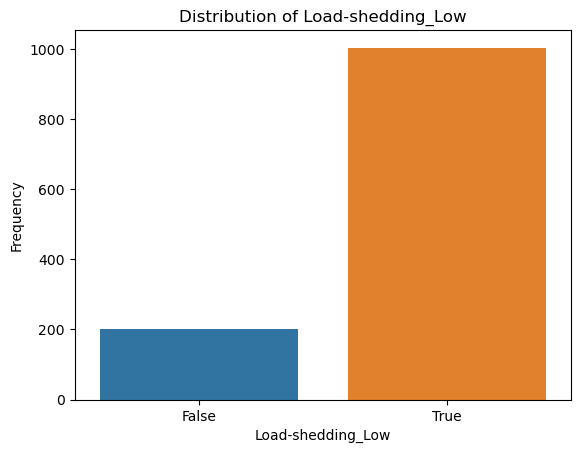

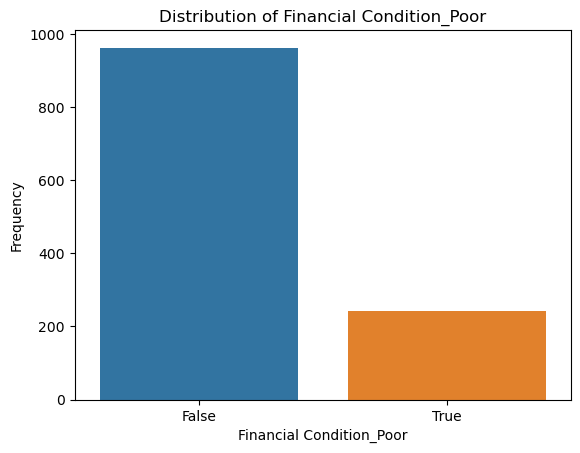

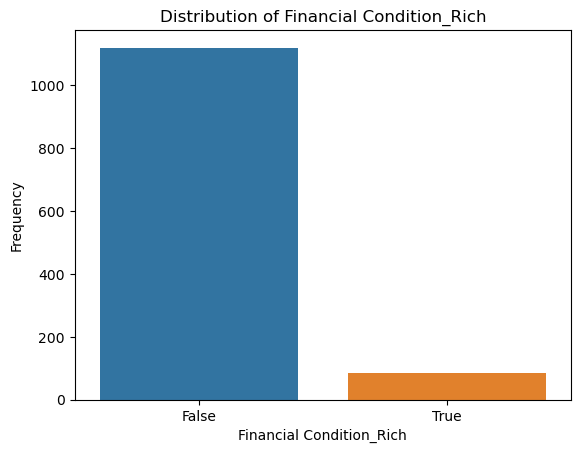

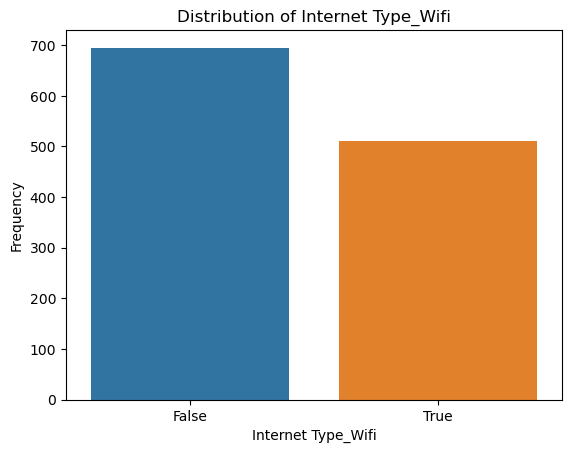

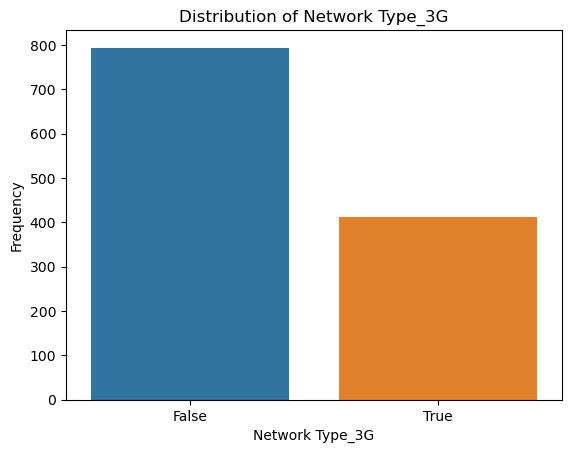

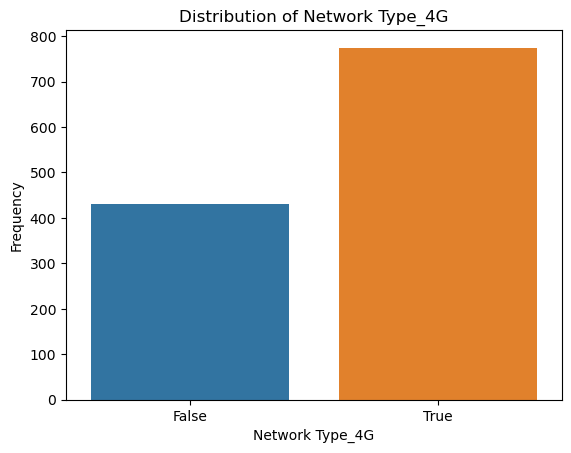

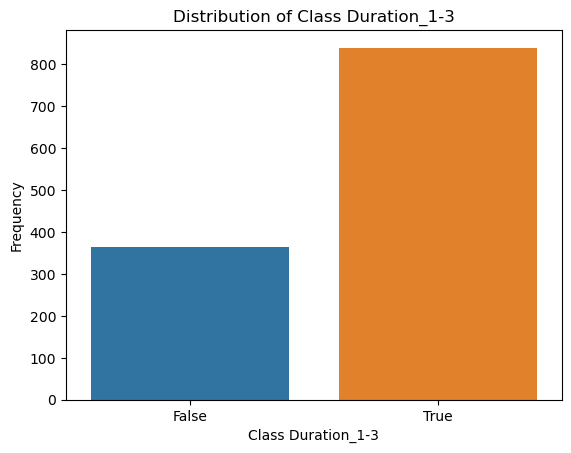

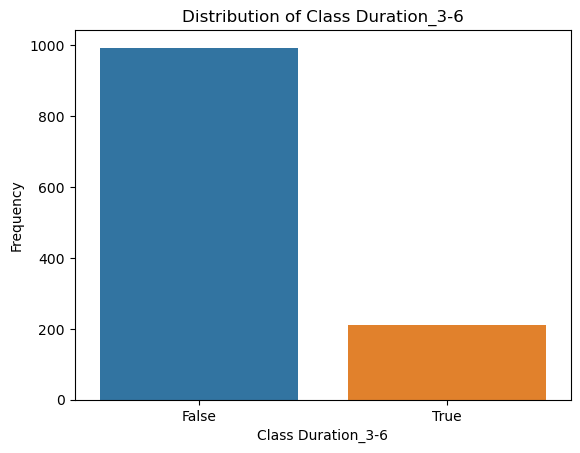

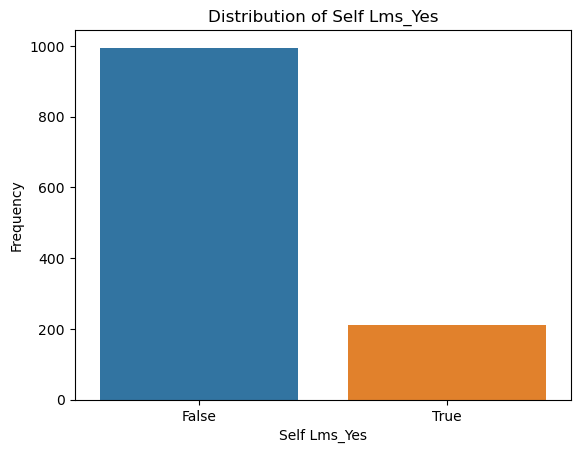

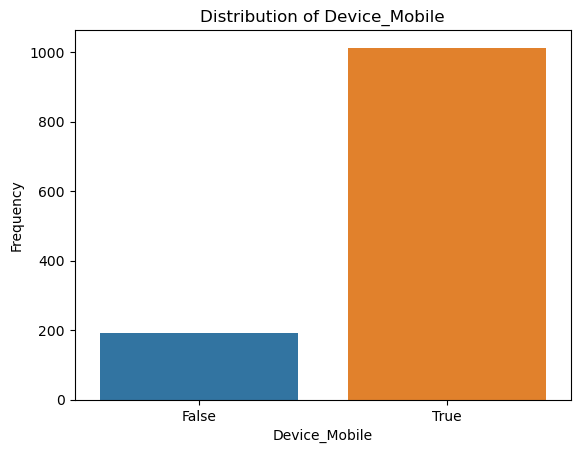

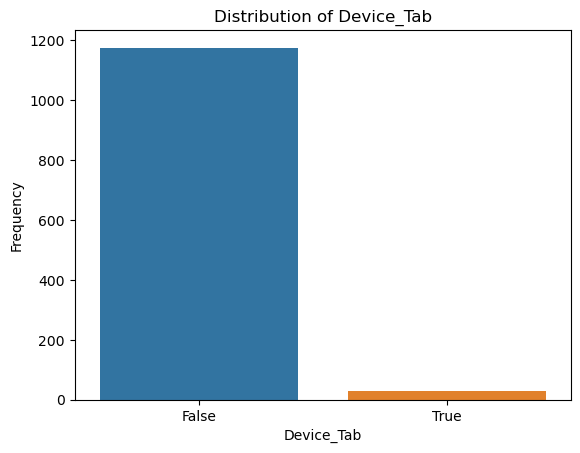

In [159]:
# Visualize distribution with bar plots
plt.figure(figsize=(1, 4))
for column in df_encoded.columns:
    sns.countplot(x=column, data=df_encoded)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Machine Learning Algorithms

Use KNN and Decision tree and find which one is working better.

### Define X and Y

In [160]:
# Splitting the dataset into features and target variable
X = df_encoded.drop('Adaptivity Level', axis=1)
y = df_encoded['Adaptivity Level']


### Feature Scaling

In [161]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Train Test Split

In [162]:
# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# KNN

In [163]:
# Function to apply KNN and evaluate
def evaluate_knn(n_neighbors, metric, X_train, y_train, X_test, y_test):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, report

In [164]:
# Applying KNN with Euclidean distance
euclidean_accuracy, euclidean_report = evaluate_knn(9, 'euclidean', X_train_scaled, y_train, X_test_scaled, y_test)

# Applying KNN with Manhattan distance
manhattan_accuracy, manhattan_report = evaluate_knn(9, 'manhattan', X_train_scaled, y_train, X_test_scaled, y_test)


#### Check different distance metric

**Euclidean**

In [165]:
# Output the results
print("Euclidean Accuracy:", euclidean_accuracy)
print("Euclidean Report:\n", euclidean_report)


Euclidean Accuracy: 0.7427385892116183
Euclidean Report:
               precision    recall  f1-score   support

        High       0.64      0.61      0.62        23
         Low       0.77      0.70      0.73       103
    Moderate       0.74      0.81      0.78       115

    accuracy                           0.74       241
   macro avg       0.72      0.71      0.71       241
weighted avg       0.74      0.74      0.74       241



**Manhattan**

In [166]:
print("Manhattan Accuracy:", manhattan_accuracy)
print("Manhattan Report:\n", manhattan_report)


Manhattan Accuracy: 0.7427385892116183
Manhattan Report:
               precision    recall  f1-score   support

        High       0.61      0.61      0.61        23
         Low       0.77      0.69      0.73       103
    Moderate       0.75      0.82      0.78       115

    accuracy                           0.74       241
   macro avg       0.71      0.71      0.71       241
weighted avg       0.74      0.74      0.74       241



# Decision Tree

**Using Entropy**

In [167]:
# Initializing and training the Decision Tree Classifier with Gini impurity
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

**Use Gini Index**

In [168]:
# Initializing and training the Decision Tree Classifier with Information Gain (Entropy)
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [169]:
# Making predictions and evaluating the models
y_pred_gini = dt_gini.predict(X_test)
y_pred_entropy = dt_entropy.predict(X_test)

accuracy_gini = accuracy_score(y_test, y_pred_gini)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

accuracy_gini, accuracy_entropy

(0.9004149377593361, 0.8879668049792531)

# All the Best!